# Neural Networks and Deep Learning

### 아래 기초에 대해 먼저 학습합니다.

### https://drive.google.com/open?id=1TdlnkFU4Zukw2ajdxm7HE8BQts0pdoP_1RDc6XDKZmg

## Keras 환경 구성 및 설치

아나콘다 프롬프트에서 다음처럼 한다. 다 설치되면 주피터 노트북을 다시 실행한다.

케라스는 파이썬 3.6에서 동작하므로, 콘다 가상환경을 만들어 준다.

$ conda create --name ai python=3.6 tensorflow keras

가상환경을 실행한다.

$ conda activate ai

머신러닝 관련 라이브러리 설치해 준다.

$ conda install  numpy scipy matplotlib ipython scikit-learn pandas pillow jupyter seaborn



In [3]:
import keras

In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## conda install -c anaconda seaborn

In [5]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')

In [6]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
X = dataset.iloc[ : , 3: -2+1 ].values

In [10]:
y = dataset.iloc[ : , -1 ].values

In [11]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [12]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [13]:
X.shape

(10000, 10)

In [14]:
y.shape

(10000,)

In [15]:
# Encoding categorical data
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [17]:
labelencoder_X_1 = LabelEncoder()
labelencoder_X_2 = LabelEncoder()

In [18]:
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

In [19]:
X

array([[619, 0, 'Female', ..., 1, 1, 101348.88],
       [608, 2, 'Female', ..., 0, 1, 112542.58],
       [502, 0, 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 0, 'Female', ..., 0, 1, 42085.58],
       [772, 1, 'Male', ..., 1, 0, 92888.52],
       [792, 0, 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [20]:
X[:, 2] = labelencoder_X_2.fit_transform( X[:, 2] )

In [21]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [22]:
from sklearn.compose import ColumnTransformer

In [23]:
ct = ColumnTransformer(
    [ ('one_hot_encoder', OneHotEncoder(categories='auto'), [ 1 ] )],
    remainder='passthrough'
)

In [24]:
X = np.array(ct.fit_transform(X), dtype=np.float)

In [25]:
X

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [26]:
X[ 0 , : ]

array([1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.1900000e+02,
       0.0000000e+00, 4.2000000e+01, 2.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0134888e+05])

In [ ]:
# Dummy varialbe trap : 즉 맨 왼쪽 하나의 컬럼은 지워도 된다. 
# 0 0 1 => 0 1
# 0 1 0 => 1 0
# 1 0 0 => 0 0

In [27]:
X = X[ : , 1: ]

In [28]:
X.shape

(10000, 11)

In [ ]:
# Splitting the dataset into the Training set and Test set

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

In [31]:
X_train.shape

(8000, 11)

In [32]:
X_test.shape

(2000, 11)

In [33]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [34]:
sc = StandardScaler()

In [35]:
X_train = sc.fit_transform(X_train)

In [36]:
X_test = sc.transform(X_test)

In [37]:
X_train

array([[-0.57581067, -0.57600312, -0.22482832, ...,  0.64376017,
        -1.03667198, -1.73674714],
       [-0.57581067, -0.57600312, -0.8357854 , ...,  0.64376017,
         0.96462528, -0.90580392],
       [-0.57581067,  1.73610172, -0.98075826, ...,  0.64376017,
         0.96462528,  0.14574389],
       ...,
       [-0.57581067, -0.57600312,  0.34470794, ...,  0.64376017,
         0.96462528, -0.22385005],
       [-0.57581067,  1.73610172,  0.36541835, ...,  0.64376017,
        -1.03667198,  0.47691986],
       [-0.57581067, -0.57600312,  0.76927133, ..., -1.55337352,
        -1.03667198,  0.583741  ]])

In [ ]:
# 레이블링 y 데이터의 모양 맞춰주기. 1차원 배열로 

In [38]:
X_train.shape

(8000, 11)

In [39]:
X_test.shape

(2000, 11)

In [40]:
y_train.shape

(8000,)

In [41]:
y_test.shape

(2000,)

In [43]:
y_train = y_train.reshape(8000,1)

In [44]:
y_test = y_test.reshape(2000,1)

In [45]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [46]:
# Initialising the ANN
classifier = Sequential()

In [47]:
# Adding the input layer and the first hidden layer
classifier.add(  Dense(input_dim = 11, output_dim = 6, activation='relu') )

E:\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=11, activation="relu", units=6)`
  


In [48]:

# Adding the second hidden layer
classifier.add( Dense(output_dim = 8, activation='relu')  )


E:\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=8)`
  


In [49]:

# Adding the output layer
classifier.add( Dense(output_dim = 1, activation= 'sigmoid') )


E:\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


In [51]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', 
                   metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [52]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=10, nb_epoch = 3)

E:\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  




Epoch 1/3





8000/8000 [==============================] - 1s 161us/step - loss: 0.5005 - acc: 0.7952
Epoch 2/3
8000/8000 [==============================] - 1s 98us/step - loss: 0.4378 - acc: 0.8119
Epoch 3/3
8000/8000 [==============================] - 1s 99us/step - loss: 0.4243 - acc: 0.8212


In [53]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [54]:
y_pred

array([[0.06338215],
       [0.38951623],
       [0.10819176],
       ...,
       [0.17020676],
       [0.14851835],
       [0.24980524]], dtype=float32)

In [58]:
y_test

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [59]:
# 0.5 이상인 사람들, 즉 이탈되는 사람에 대한것만 
y_pred = (y_pred > 0.5)


In [60]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

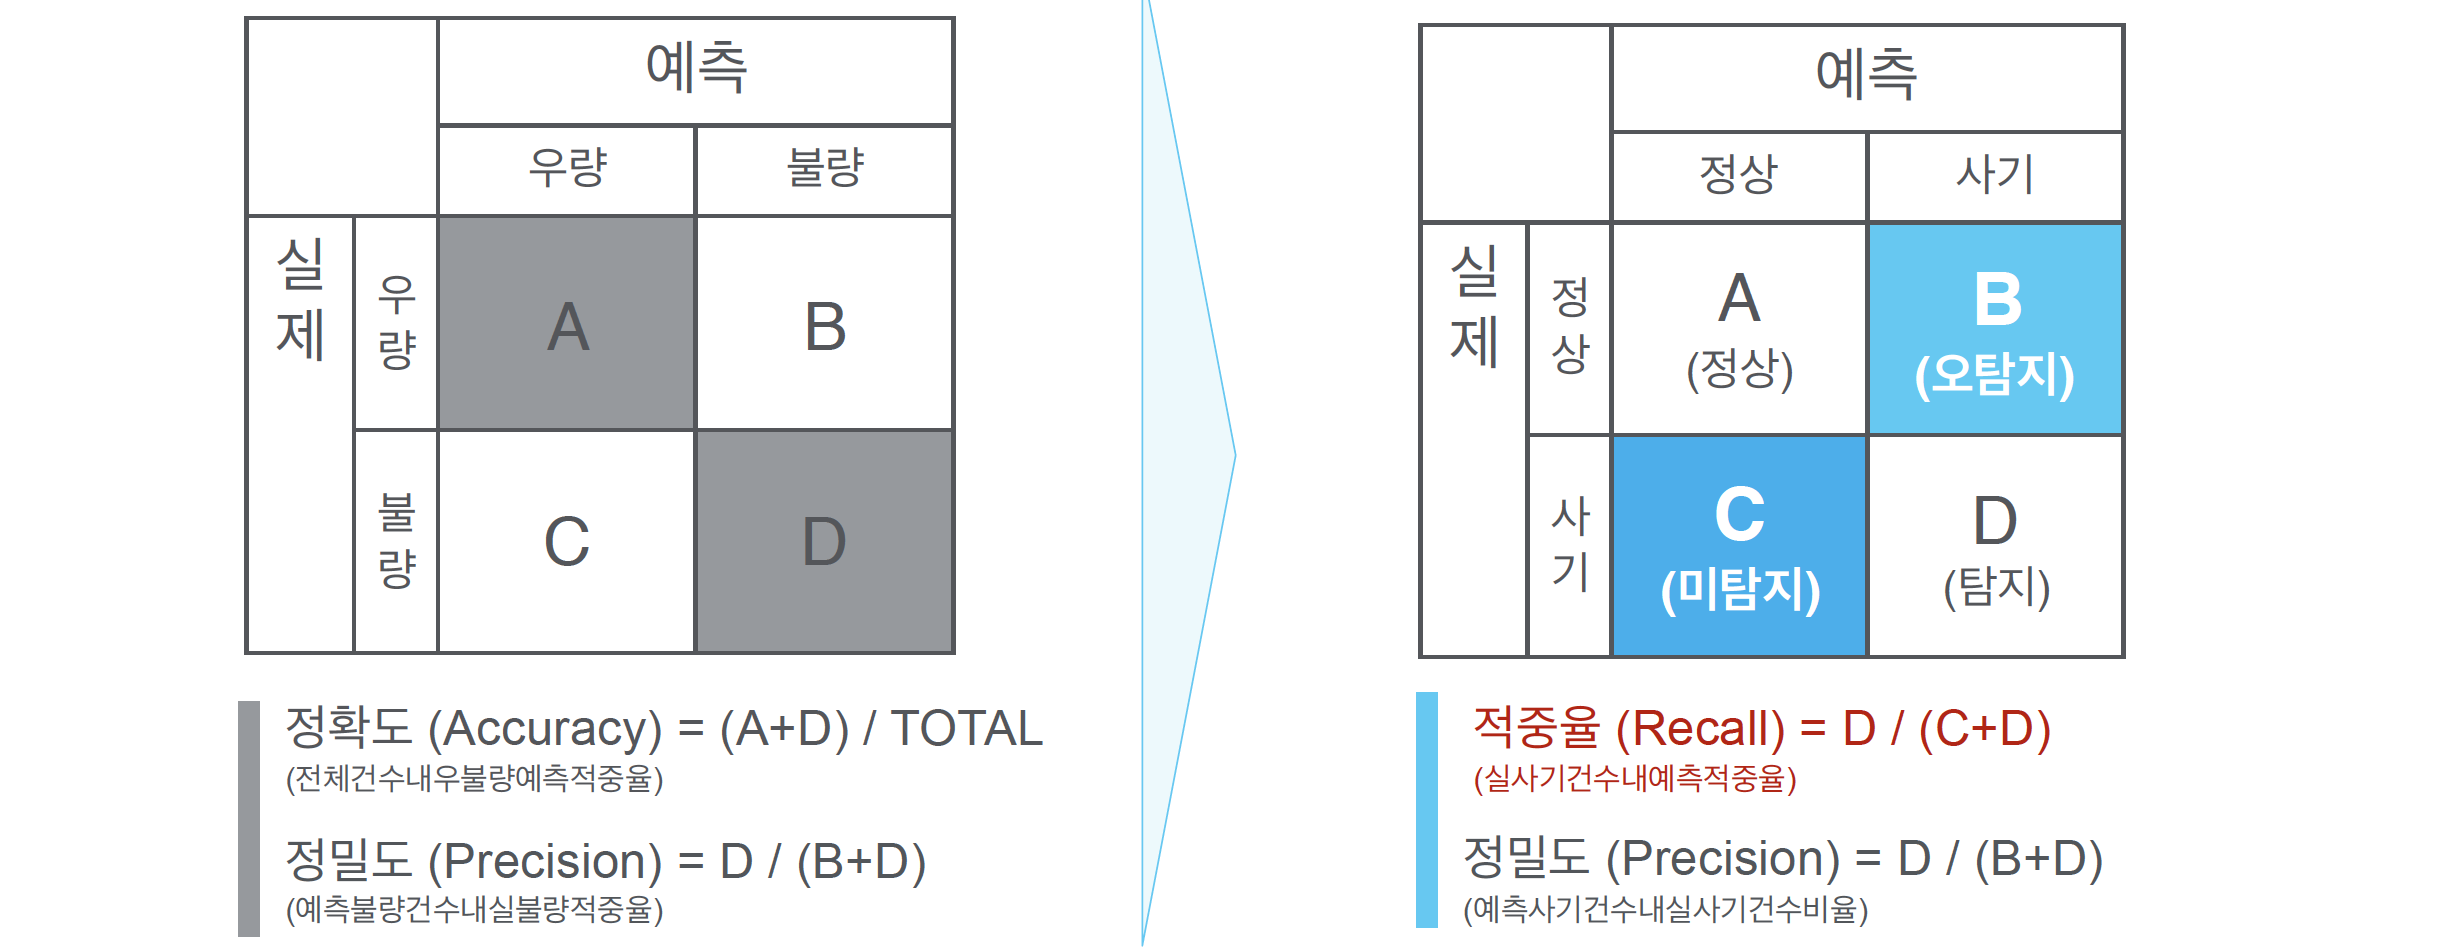

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
cm = confusion_matrix(y_test, y_pred)

In [63]:
cm

array([[1522,   67],
       [ 300,  111]], dtype=int64)

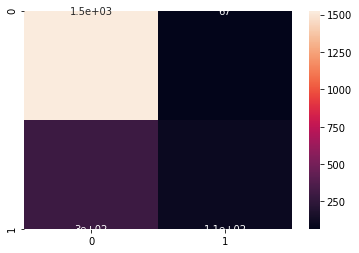

In [64]:
sns.heatmap(cm, annot=True)

In [ ]:
# 로스와 정확도만 따로 볼때

In [65]:
score = classifier.evaluate(X_test, y_test)

2000/2000 [==============================] - 0s 60us/step


In [67]:
score

[0.42321315956115724, 0.8165]

In [68]:
print('loss = ', score[0])
print('accuracy = ', score[1])

loss =  0.42321315956115724
accuracy =  0.8165


In [ ]:
# visualizing

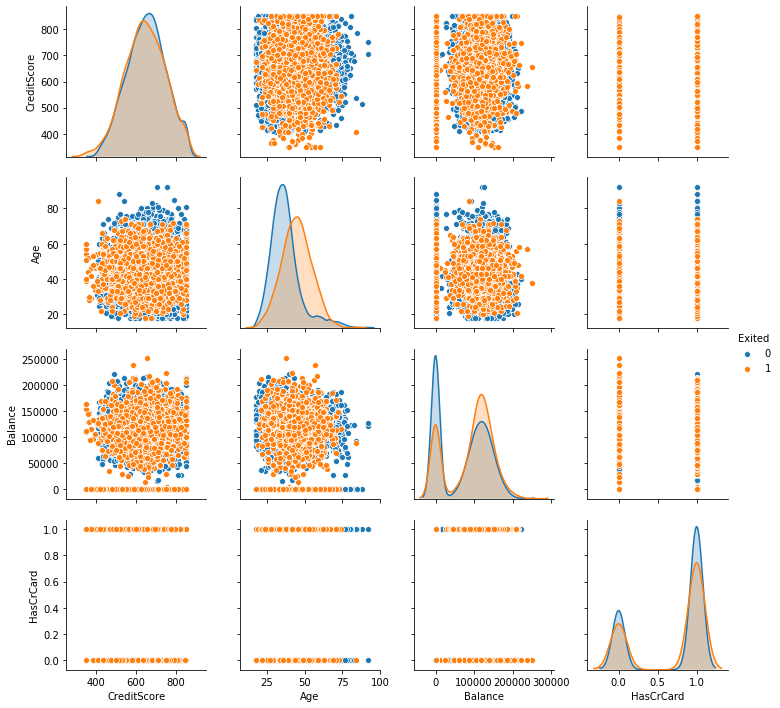

In [69]:
sns.pairplot(dataset, hue='Exited', vars=['CreditScore', 'Age', 'Balance', 
                                          'HasCrCard'])

In [70]:
dataset.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


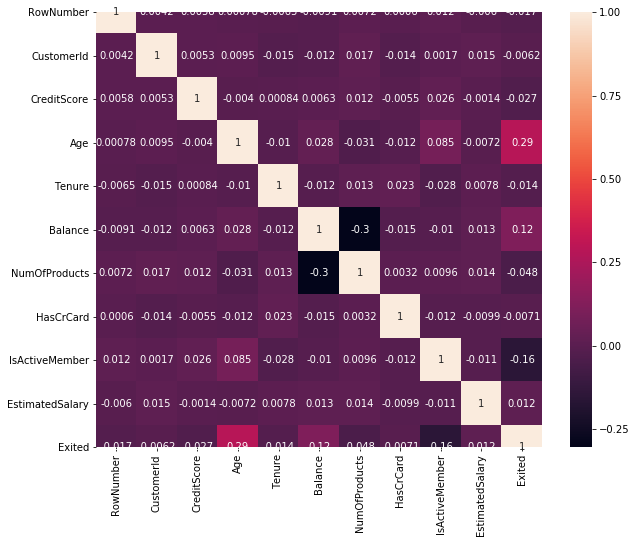

In [72]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True)

## 다음 사람은 남아있을까 떠날까? 분류해 보자

- Geography: France
- Credit Score: 600
- Gender: Male
- Age: 40
- Tenure: 3
- Balance: 60000
- Number of Products: 2
- Has Credit Card: Yes
- Is Active Member: Yes
- Estimated Salary: 50000

In [73]:
new_data = np.array(  [    
                            [0,0 ,600,1 ,40 ,3 ,60000 ,2 ,1 ,1 ,50000]    
                        ]   )

In [74]:
new_data.shape

(1, 11)

In [75]:
new_data = sc.transform(new_data)

In [76]:
new_data

array([[-0.57581067, -0.57600312, -0.52512926,  0.91578261,  0.09984529,
        -0.69225851, -0.27163219,  0.80898739,  0.64376017,  0.96462528,
        -0.87024388]])

In [77]:
new_pred = classifier.predict(new_data)

In [78]:
new_pred

array([[0.07476178]], dtype=float32)

In [79]:
new_pred = (new_pred > 0.5)

In [80]:
new_pred

array([[False]])

### 용어 정리

epoch

- 한 번의 epoch는 신경망에서 전체 데이터 셋에 대해 forward pass/backward pass 과정을 거친 것을 말함. 즉, 전체 데이터 셋에 대해 한 번 학습을 완료한 상태


batch_size

메모리의 한계와 속도 저하 때문에 대부분의 경우에는 한 번의 epoch에서 모든 데이터를 한꺼번에 집어넣을 수는 없습니다. 그래서 데이터를 나누어서 주게 되는데 이때 몇 번 나누어서 주는가를 iteration, 각 iteration마다 주는 데이터 사이즈를 batch size라고 합니다.

출처: https://www.slideshare.net/w0ong/ss-82372826

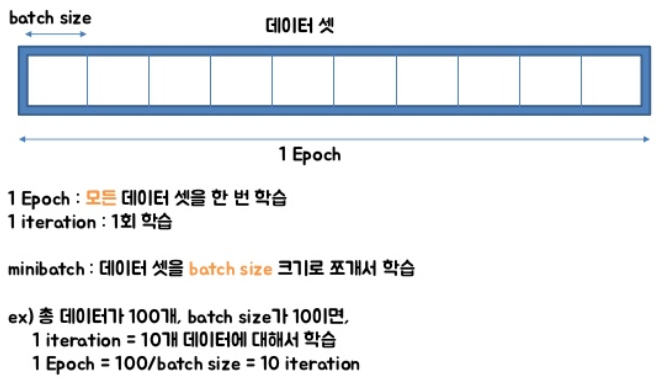

In [81]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

In [82]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add( Dense(input_dim=11, output_dim=6, activation='relu'))
    classifier.add( Dense(output_dim=8, activation='relu'))
    classifier.add( Dense(output_dim=5, activation='relu'))
    classifier.add( Dense(output_dim=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy',
                      metrics=['accuracy'])
    return classifier

In [83]:
classifier = KerasClassifier(build_fn= build_classifier)

In [84]:
parameters = { 'batch_size' : [ 10, 20 ],
             'epochs': [10, 20, 30],
             'optimizer':['adam', 'rmsprop']}

In [85]:
grid_seach = GridSearchCV(estimator= classifier,
                         param_grid= parameters,
                         scoring='accuracy',
                         cv = 10)

In [86]:
grid_seach = grid_seach.fit(X_train, y_train)

E:\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=11, activation="relu", units=6)`
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=8)`
  after removing the cwd from sys.path.
E:\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  """


Epoch 1/10
7200/7200 [==============================] - 1s 186us/step - loss: 0.4998 - acc: 0.7990
Epoch 2/10
7200/7200 [==============================] - 1s 100us/step - loss: 0.4300 - acc: 0.8208
Epoch 3/10
7200/7200 [==============================] - 1s 92us/step - loss: 0.4113 - acc: 0.8272
Epoch 4/10
7200/7200 [==============================] - 1s 95us/step - loss: 0.3958 - acc: 0.8294
Epoch 5/10
7200/7200 [==============================] - 1s 96us/step - loss: 0.3786 - acc: 0.8436
Epoch 6/10
7200/7200 [==============================] - 1s 101us/step - loss: 0.3614 - acc: 0.8558
Epoch 7/10
7200/7200 [==============================] - 1s 97us/step - loss: 0.3521 - acc: 0.8572
Epoch 8/10
7200/7200 [==============================] - 1s 92us/step - loss: 0.3462 - acc: 0.8594
Epoch 9/10
7200/7200 [==============================] - 1s 98us/step - loss: 0.3442 - acc: 0.8585
Epoch 10/10
7200/7200 [==============================] - 1s 98us/step - loss: 0.3428 - acc: 0.8596
Epoch 1/10
7200/

Epoch 4/10
7200/7200 [==============================] - 1s 111us/step - loss: 0.4003 - acc: 0.8279
Epoch 5/10
7200/7200 [==============================] - 1s 101us/step - loss: 0.3921 - acc: 0.8310
Epoch 6/10
7200/7200 [==============================] - 1s 100us/step - loss: 0.3844 - acc: 0.8368
Epoch 7/10
7200/7200 [==============================] - 1s 101us/step - loss: 0.3777 - acc: 0.8443
Epoch 8/10
7200/7200 [==============================] - 1s 106us/step - loss: 0.3721 - acc: 0.8474
Epoch 9/10
7200/7200 [==============================] - 1s 99us/step - loss: 0.3666 - acc: 0.8515
Epoch 10/10
7200/7200 [==============================] - 1s 97us/step - loss: 0.3616 - acc: 0.8524
Epoch 1/10
7200/7200 [==============================] - 1s 202us/step - loss: 0.5055 - acc: 0.7924
Epoch 2/10
7200/7200 [==============================] - 1s 103us/step - loss: 0.4445 - acc: 0.8043
Epoch 3/10
7200/7200 [==============================] - 1s 103us/step - loss: 0.4283 - acc: 0.8093
Epoch 4/10


7200/7200 [==============================] - 1s 107us/step - loss: 0.3775 - acc: 0.8433
Epoch 7/10
7200/7200 [==============================] - 1s 99us/step - loss: 0.3686 - acc: 0.8467
Epoch 8/10
7200/7200 [==============================] - 1s 100us/step - loss: 0.3626 - acc: 0.8483
Epoch 9/10
7200/7200 [==============================] - 1s 103us/step - loss: 0.3580 - acc: 0.8499
Epoch 10/10
7200/7200 [==============================] - 1s 110us/step - loss: 0.3545 - acc: 0.8506
Epoch 1/10
7200/7200 [==============================] - 2s 223us/step - loss: 0.5173 - acc: 0.7886
Epoch 2/10
7200/7200 [==============================] - 1s 116us/step - loss: 0.4417 - acc: 0.8060
Epoch 3/10
7200/7200 [==============================] - 1s 105us/step - loss: 0.4152 - acc: 0.8235
Epoch 4/10
7200/7200 [==============================] - 1s 106us/step - loss: 0.3970 - acc: 0.8310
Epoch 5/10
7200/7200 [==============================] - 1s 106us/step - loss: 0.3832 - acc: 0.8378
Epoch 6/10
7200/7200 

7200/7200 [==============================] - 1s 114us/step - loss: 0.3825 - acc: 0.8385
Epoch 9/20
7200/7200 [==============================] - 1s 119us/step - loss: 0.3742 - acc: 0.8407
Epoch 10/20
7200/7200 [==============================] - 1s 113us/step - loss: 0.3664 - acc: 0.8462
Epoch 11/20
7200/7200 [==============================] - 1s 116us/step - loss: 0.3595 - acc: 0.8500
Epoch 12/20
7200/7200 [==============================] - 1s 116us/step - loss: 0.3532 - acc: 0.8526
Epoch 13/20
7200/7200 [==============================] - 1s 120us/step - loss: 0.3478 - acc: 0.8575
Epoch 14/20
7200/7200 [==============================] - 1s 114us/step - loss: 0.3441 - acc: 0.8583
Epoch 15/20
7200/7200 [==============================] - 1s 116us/step - loss: 0.3410 - acc: 0.8622
Epoch 16/20
7200/7200 [==============================] - 1s 115us/step - loss: 0.3384 - acc: 0.8633
Epoch 17/20
7200/7200 [==============================] - 1s 119us/step - loss: 0.3360 - acc: 0.8661
Epoch 18/20
7

7200/7200 [==============================] - 1s 127us/step - loss: 0.3858 - acc: 0.8296
Epoch 11/20
7200/7200 [==============================] - 1s 116us/step - loss: 0.3823 - acc: 0.8297
Epoch 12/20
7200/7200 [==============================] - 1s 117us/step - loss: 0.3785 - acc: 0.8303
Epoch 13/20
7200/7200 [==============================] - 1s 124us/step - loss: 0.3762 - acc: 0.8369
Epoch 14/20
7200/7200 [==============================] - 1s 117us/step - loss: 0.3735 - acc: 0.8426
Epoch 15/20
7200/7200 [==============================] - 1s 116us/step - loss: 0.3717 - acc: 0.8411
Epoch 16/20
7200/7200 [==============================] - 1s 118us/step - loss: 0.3704 - acc: 0.8440
Epoch 17/20
7200/7200 [==============================] - 1s 123us/step - loss: 0.3676 - acc: 0.8450
Epoch 18/20
7200/7200 [==============================] - 1s 116us/step - loss: 0.3660 - acc: 0.8461
Epoch 19/20
7200/7200 [==============================] - 1s 125us/step - loss: 0.3656 - acc: 0.8468
Epoch 20/20


7200/7200 [==============================] - 1s 117us/step - loss: 0.3679 - acc: 0.8532
Epoch 13/20
7200/7200 [==============================] - 1s 115us/step - loss: 0.3594 - acc: 0.8556
Epoch 14/20
7200/7200 [==============================] - 1s 121us/step - loss: 0.3538 - acc: 0.8562
Epoch 15/20
7200/7200 [==============================] - 1s 117us/step - loss: 0.3495 - acc: 0.8599
Epoch 16/20
7200/7200 [==============================] - 1s 113us/step - loss: 0.3467 - acc: 0.8599
Epoch 17/20
7200/7200 [==============================] - 1s 116us/step - loss: 0.3455 - acc: 0.8568
Epoch 18/20
7200/7200 [==============================] - 1s 123us/step - loss: 0.3431 - acc: 0.8607
Epoch 19/20
7200/7200 [==============================] - 1s 114us/step - loss: 0.3429 - acc: 0.8597
Epoch 20/20
7200/7200 [==============================] - 1s 115us/step - loss: 0.3420 - acc: 0.8619
Epoch 1/20
7200/7200 [==============================] - 2s 293us/step - loss: 0.5011 - acc: 0.7940
Epoch 2/20
72

7200/7200 [==============================] - 1s 120us/step - loss: 0.3809 - acc: 0.8403
Epoch 15/20
7200/7200 [==============================] - 1s 129us/step - loss: 0.3783 - acc: 0.8419
Epoch 16/20
7200/7200 [==============================] - 1s 119us/step - loss: 0.3757 - acc: 0.8425
Epoch 17/20
7200/7200 [==============================] - 1s 119us/step - loss: 0.3734 - acc: 0.8453
Epoch 18/20
7200/7200 [==============================] - 1s 129us/step - loss: 0.3713 - acc: 0.8450
Epoch 19/20
7200/7200 [==============================] - 1s 119us/step - loss: 0.3696 - acc: 0.8442
Epoch 20/20
7200/7200 [==============================] - 1s 116us/step - loss: 0.3671 - acc: 0.8475
Epoch 1/20
7200/7200 [==============================] - 2s 319us/step - loss: 0.5130 - acc: 0.7887
Epoch 2/20
7200/7200 [==============================] - 1s 124us/step - loss: 0.4449 - acc: 0.8042
Epoch 3/20
7200/7200 [==============================] - 1s 130us/step - loss: 0.4248 - acc: 0.8078
Epoch 4/20
7200

7200/7200 [==============================] - 1s 130us/step - loss: 0.3451 - acc: 0.8590
Epoch 17/20
7200/7200 [==============================] - 1s 130us/step - loss: 0.3422 - acc: 0.8611
Epoch 18/20
7200/7200 [==============================] - 1s 137us/step - loss: 0.3403 - acc: 0.8610
Epoch 19/20
7200/7200 [==============================] - 1s 126us/step - loss: 0.3390 - acc: 0.8593
Epoch 20/20
7200/7200 [==============================] - 1s 128us/step - loss: 0.3381 - acc: 0.8612
Epoch 1/20
7200/7200 [==============================] - 2s 342us/step - loss: 0.4883 - acc: 0.7865
Epoch 2/20
7200/7200 [==============================] - 1s 126us/step - loss: 0.4448 - acc: 0.8004
Epoch 3/20
7200/7200 [==============================] - 1s 130us/step - loss: 0.4294 - acc: 0.8101
Epoch 4/20
7200/7200 [==============================] - 1s 124us/step - loss: 0.4182 - acc: 0.8194
Epoch 5/20
7200/7200 [==============================] - 1s 121us/step - loss: 0.4086 - acc: 0.8239
Epoch 6/20
7200/7

7200/7200 [==============================] - 1s 126us/step - loss: 0.3377 - acc: 0.8639
Epoch 29/30
7200/7200 [==============================] - 1s 129us/step - loss: 0.3375 - acc: 0.8622
Epoch 30/30
7200/7200 [==============================] - 1s 137us/step - loss: 0.3373 - acc: 0.8600
Epoch 1/30
7200/7200 [==============================] - 3s 396us/step - loss: 0.5555 - acc: 0.7531
Epoch 2/30
7200/7200 [==============================] - 1s 134us/step - loss: 0.4420 - acc: 0.7993
Epoch 3/30
7200/7200 [==============================] - 1s 135us/step - loss: 0.4146 - acc: 0.8100
Epoch 4/30
7200/7200 [==============================] - 1s 136us/step - loss: 0.3876 - acc: 0.8254
Epoch 5/30
7200/7200 [==============================] - 1s 133us/step - loss: 0.3676 - acc: 0.8404
Epoch 6/30
7200/7200 [==============================] - 1s 139us/step - loss: 0.3578 - acc: 0.8454
Epoch 7/30
7200/7200 [==============================] - 1s 132us/step - loss: 0.3528 - acc: 0.8497
Epoch 8/30
7200/720

7200/7200 [==============================] - 1s 135us/step - loss: 0.3374 - acc: 0.8610
Epoch 21/30
7200/7200 [==============================] - 1s 141us/step - loss: 0.3378 - acc: 0.8622
Epoch 22/30
7200/7200 [==============================] - 1s 132us/step - loss: 0.3376 - acc: 0.8622
Epoch 23/30
7200/7200 [==============================] - 1s 131us/step - loss: 0.3370 - acc: 0.8611
Epoch 24/30
7200/7200 [==============================] - 1s 138us/step - loss: 0.3368 - acc: 0.8631
Epoch 25/30
7200/7200 [==============================] - 1s 134us/step - loss: 0.3360 - acc: 0.8619
Epoch 26/30
7200/7200 [==============================] - 1s 133us/step - loss: 0.3356 - acc: 0.8615
Epoch 27/30
7200/7200 [==============================] - 1s 139us/step - loss: 0.3358 - acc: 0.8632
Epoch 28/30
7200/7200 [==============================] - 1s 133us/step - loss: 0.3355 - acc: 0.8635
Epoch 29/30
7200/7200 [==============================] - 1s 133us/step - loss: 0.3351 - acc: 0.8635
Epoch 30/30


7200/7200 [==============================] - 1s 142us/step - loss: 0.3507 - acc: 0.8519
Epoch 13/30
7200/7200 [==============================] - 1s 147us/step - loss: 0.3492 - acc: 0.8533
Epoch 14/30
7200/7200 [==============================] - 1s 140us/step - loss: 0.3482 - acc: 0.8537
Epoch 15/30
7200/7200 [==============================] - 1s 141us/step - loss: 0.3473 - acc: 0.8540
Epoch 16/30
7200/7200 [==============================] - 1s 145us/step - loss: 0.3464 - acc: 0.8519
Epoch 17/30
7200/7200 [==============================] - 1s 140us/step - loss: 0.3461 - acc: 0.8536
Epoch 18/30
7200/7200 [==============================] - 1s 142us/step - loss: 0.3449 - acc: 0.8542
Epoch 19/30
7200/7200 [==============================] - 1s 148us/step - loss: 0.3446 - acc: 0.8560
Epoch 20/30
7200/7200 [==============================] - 1s 139us/step - loss: 0.3443 - acc: 0.8556
Epoch 21/30
7200/7200 [==============================] - 1s 140us/step - loss: 0.3436 - acc: 0.8557
Epoch 22/30


7200/7200 [==============================] - 1s 130us/step - loss: 0.4219 - acc: 0.8225
Epoch 5/30
7200/7200 [==============================] - 1s 128us/step - loss: 0.4176 - acc: 0.8250
Epoch 6/30
7200/7200 [==============================] - 1s 129us/step - loss: 0.4149 - acc: 0.8268
Epoch 7/30
7200/7200 [==============================] - 1s 124us/step - loss: 0.4127 - acc: 0.8285
Epoch 8/30
7200/7200 [==============================] - 1s 126us/step - loss: 0.4103 - acc: 0.8311
Epoch 9/30
7200/7200 [==============================] - 1s 129us/step - loss: 0.4085 - acc: 0.8301
Epoch 10/30
7200/7200 [==============================] - 1s 123us/step - loss: 0.4074 - acc: 0.8319
Epoch 11/30
7200/7200 [==============================] - 1s 127us/step - loss: 0.4061 - acc: 0.8326
Epoch 12/30
7200/7200 [==============================] - 1s 131us/step - loss: 0.4047 - acc: 0.8342
Epoch 13/30
7200/7200 [==============================] - 1s 130us/step - loss: 0.4040 - acc: 0.8351
Epoch 14/30
7200/

7200/7200 [==============================] - 1s 154us/step - loss: 0.3348 - acc: 0.8682
Epoch 27/30
7200/7200 [==============================] - 1s 130us/step - loss: 0.3343 - acc: 0.8662
Epoch 28/30
7200/7200 [==============================] - 1s 134us/step - loss: 0.3335 - acc: 0.8675
Epoch 29/30
7200/7200 [==============================] - 1s 128us/step - loss: 0.3336 - acc: 0.8665
Epoch 30/30
7200/7200 [==============================] - 1s 136us/step - loss: 0.3335 - acc: 0.8672
Epoch 1/30
7200/7200 [==============================] - 3s 414us/step - loss: 0.4922 - acc: 0.7947
Epoch 2/30
7200/7200 [==============================] - 1s 127us/step - loss: 0.4310 - acc: 0.8097
Epoch 3/30
7200/7200 [==============================] - 1s 131us/step - loss: 0.4212 - acc: 0.8126
Epoch 4/30
7200/7200 [==============================] - 1s 127us/step - loss: 0.4137 - acc: 0.8157
Epoch 5/30
7200/7200 [==============================] - 1s 125us/step - loss: 0.4073 - acc: 0.8212
Epoch 6/30
7200/7

7200/7200 [==============================] - 1s 132us/step - loss: 0.3995 - acc: 0.8393
Epoch 18/30
7200/7200 [==============================] - 1s 130us/step - loss: 0.3996 - acc: 0.8382
Epoch 19/30
7200/7200 [==============================] - 1s 135us/step - loss: 0.3990 - acc: 0.8397
Epoch 20/30
7200/7200 [==============================] - 1s 130us/step - loss: 0.3993 - acc: 0.8401
Epoch 21/30
7200/7200 [==============================] - 1s 159us/step - loss: 0.3989 - acc: 0.8394
Epoch 22/30
7200/7200 [==============================] - 1s 140us/step - loss: 0.3981 - acc: 0.8392
Epoch 23/30
7200/7200 [==============================] - 1s 131us/step - loss: 0.3980 - acc: 0.8406
Epoch 24/30
7200/7200 [==============================] - 1s 132us/step - loss: 0.3981 - acc: 0.8419
Epoch 25/30
7200/7200 [==============================] - 1s 130us/step - loss: 0.3976 - acc: 0.8408
Epoch 26/30
7200/7200 [==============================] - 1s 136us/step - loss: 0.3972 - acc: 0.8399
Epoch 27/30


7200/7200 [==============================] - 1s 145us/step - loss: 0.3854 - acc: 0.8332
Epoch 10/30
7200/7200 [==============================] - 1s 135us/step - loss: 0.3798 - acc: 0.8371
Epoch 11/30
7200/7200 [==============================] - 1s 136us/step - loss: 0.3742 - acc: 0.8394
Epoch 12/30
7200/7200 [==============================] - 1s 148us/step - loss: 0.3685 - acc: 0.8431
Epoch 13/30
7200/7200 [==============================] - 1s 147us/step - loss: 0.3639 - acc: 0.8460
Epoch 14/30
7200/7200 [==============================] - 1s 138us/step - loss: 0.3604 - acc: 0.8462
Epoch 15/30
7200/7200 [==============================] - 1s 146us/step - loss: 0.3564 - acc: 0.8483
Epoch 16/30
7200/7200 [==============================] - 1s 133us/step - loss: 0.3524 - acc: 0.8501
Epoch 17/30
7200/7200 [==============================] - 1s 136us/step - loss: 0.3496 - acc: 0.8549
Epoch 18/30
7200/7200 [==============================] - 1s 143us/step - loss: 0.3470 - acc: 0.8544
Epoch 19/30


7200/7200 [==============================] - 4s 515us/step - loss: 0.5864 - acc: 0.7150
Epoch 2/10
7200/7200 [==============================] - 1s 81us/step - loss: 0.4730 - acc: 0.7972
Epoch 3/10
7200/7200 [==============================] - 1s 87us/step - loss: 0.4328 - acc: 0.8117
Epoch 4/10
7200/7200 [==============================] - 1s 82us/step - loss: 0.4103 - acc: 0.8236
Epoch 5/10
7200/7200 [==============================] - 1s 88us/step - loss: 0.4022 - acc: 0.8265
Epoch 6/10
7200/7200 [==============================] - 1s 80us/step - loss: 0.3964 - acc: 0.8279
Epoch 7/10
7200/7200 [==============================] - 1s 93us/step - loss: 0.3914 - acc: 0.8296
Epoch 8/10
7200/7200 [==============================] - 1s 105us/step - loss: 0.3864 - acc: 0.8289
Epoch 9/10
7200/7200 [==============================] - 1s 86us/step - loss: 0.3820 - acc: 0.8301
Epoch 10/10
7200/7200 [==============================] - 1s 78us/step - loss: 0.3783 - acc: 0.8317
Epoch 1/10
7200/7200 [======

KeyboardInterrupt: 

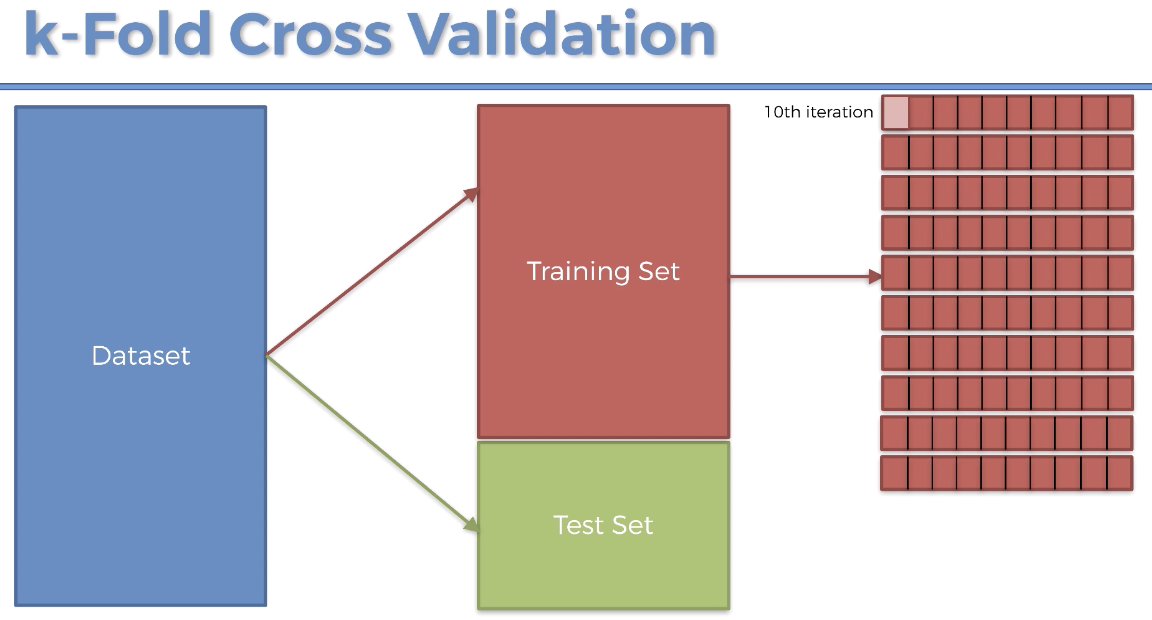

In [ ]:
best_parameters = grid_search.best_params_

In [ ]:
best_accuracy = grid_seach.best_score_